<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/main/Week%209/Explanatory_Analysis_of_KMeans_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
fpath="/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week09/Data/Country-data - Country-data.csv"
df = pd.read_csv(fpath, index_col="country")
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Checking for duplicate data
print(f"Number of Duplicated Rows: {df.duplicated().sum()}")
df.info()

Number of Duplicated Rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [5]:
#Summary stats of our dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#Always scale data when dealing with distance based algorithms like KMean
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Fit some KMeans modes with different numbers of clusters

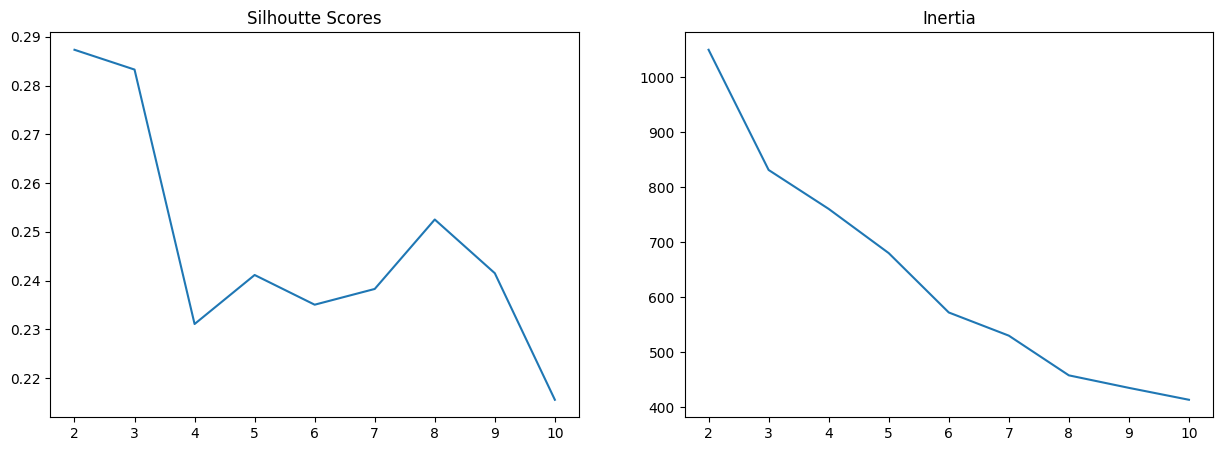

In [7]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    sils.append(silhouette_score(X_scaled, kmeans.labels_))
    inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title("Silhoutte Scores")
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title("Inertia")
axes[1].set_xticks(ks);

# Assigning a Cluster & Make a New Column

In [8]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df["cluster"] = kmeans.labels_
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [14]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 0, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1,
       2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 0,
       3, 2, 2, 2, 2, 1, 1, 0, 0, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 3, 3, 2, 3, 0, 2, 1, 1, 3, 0, 1, 0, 2, 1,
       1, 2, 0, 3, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       3, 3, 1, 1, 3, 2, 1, 0, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 3, 3, 2, 2, 1, 2, 3, 3, 2, 1, 0, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 0, 1, 1], dtype=int32)

In [9]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby("cluster", as_index=False).mean()
cluster_groups

,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,14.764000,71.244000,7.108000,78.916000,18314.800000,3.698800,73.732000,2.082800,10894.000000
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,23.147692,34.284446,5.951385,39.959475,12300.000000,8.543046,72.993846,2.322154,6472.492308
3,3,4.940000,49.516667,9.114000,42.373333,47350.000000,2.895767,80.436667,1.797333,46053.333333


# Visualizing the Clusters




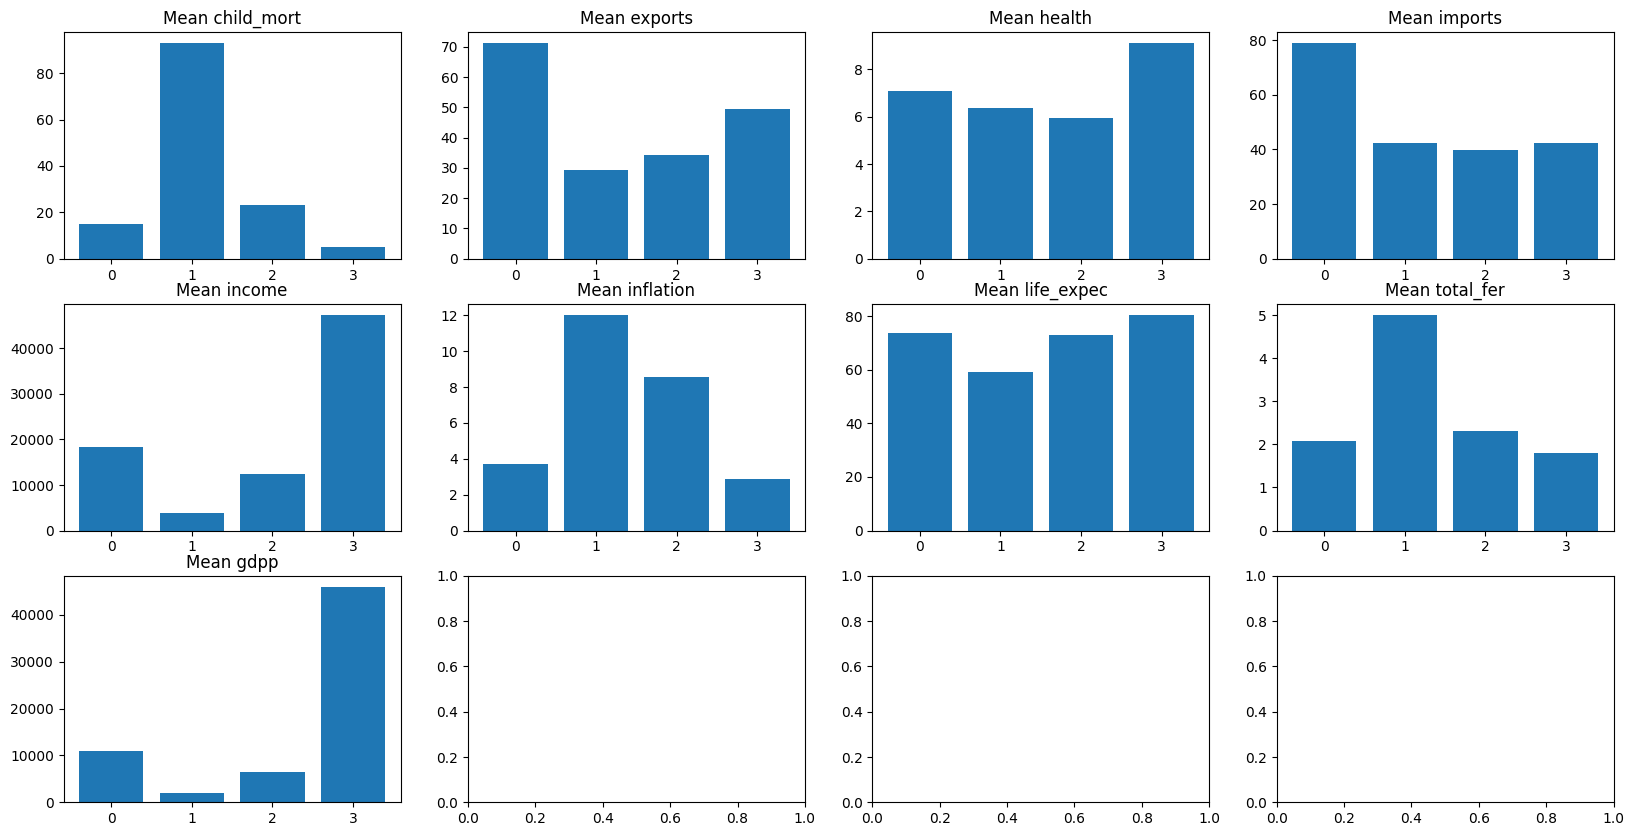

In [10]:
# Visualize means
# # fig is an array of dimensions 3,4. axes.ravel() will flatten it to 12,1
fig, axes = plt.subplots(3,4, figsize=(20,10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
    axes[i].bar(cluster_groups["cluster"], cluster_groups[col])
    axes[i].set_title(f"Mean {col}")

# Filtering the Data Frame by Cluster

We will filter our `cluster` category for cluster 1's to find out which countries are in this group.

In [11]:
#List the countries that are classified as 1
df.loc[df["cluster"]==1].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'],
      dtype='object', name='country')